In [2]:
import pandas as pd

In [3]:

import pandas as pd

import plotly.express as px
df = pd.read_csv('../data/order.csv')



In [4]:
df.drop(columns=['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], inplace=True)
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['ShippedDate'] = pd.to_datetime(df['ShippedDate'])

KeyError: "['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'] not found in axis"

In [ ]:
# Dicionário de mapeamento
mudar = {
    'pending': 'Pendente',
    'processing': 'Em Processamento',
    'delivered': 'Entregue',
    'shipped': 'Enviado ao Cliente'
}

# Mapeando a coluna OrderStatus
df['OrderStatus'] = df['OrderStatus'].map(mudar)

In [ ]:
# Dicionário de mapeamento
mudar = {
    'cash on delivery': 'Pago na Entrega', 'PayPal': 'PayPal', 'credit card': 'Cartão de Crédito'
}

# Mapeando a coluna OrderStatus
df['PaymentMethod'] = df['PaymentMethod'].map(mudar)

,PaymentMethod,Unnamed: 0
0,Cartão de Crédito,317
1,Pago na Entrega,310
2,PayPal,373


In [64]:
df.to_csv('../data/order.csv')

In [20]:
from geopy.geocoders import Nominatim
import folium
from streamlit_folium import folium_static

2024-10-15 15:52:17.246 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [45]:
# Função para geocodificar endereços
def geocode_address(address):
    geolocator = Nominatim(user_agent="test")
    location = geolocator.geocode(address)
    if location:
        return (location.latitude, location.longitude)
    return (None, None)

# Exemplo de dataset de endereços
data = {
    'Address': ['Rua Miguel Di Credo, 110 - Botucatu', 'Rua Milton Carbonari, 61', 'Rua Dr. Adolfo Lutz, 659', 
                ],
    'Total Sales': [1000, 1500, 2000]  # Exemplo de dados de vendas
}
df = pd.DataFrame(data)

# Adicionando colunas de latitude e longitude no DataFrame
df['Latitude'], df['Longitude'] = zip(*df['Address'].apply(geocode_address))

In [46]:
df.to_csv('../data/dados_lat.csv')

In [42]:
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]  # Centralizar o mapa
mymap = folium.Map(location=map_center, zoom_start=10)

# Adicionar marcadores para cada endereço
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Endereço: {row['Address']}<br>Vendas: ${row['Total Sales']}",
        tooltip=row['Address']
    ).add_to(mymap)



In [43]:
mymap

# Cohort

In [10]:
import pandas as pd
import datetime as dt

In [7]:
df = pd.read_csv('../data/data.csv', encoding='unicode_escape')

In [8]:
def get_month(x): return dt.datetime(x.year, x.month, 1) 

def get_dates(df, col):
    
    year = df[col].dt.year
    month = df[col].dt.month
    day = df[col].dt.day
    
    return year, month, day

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


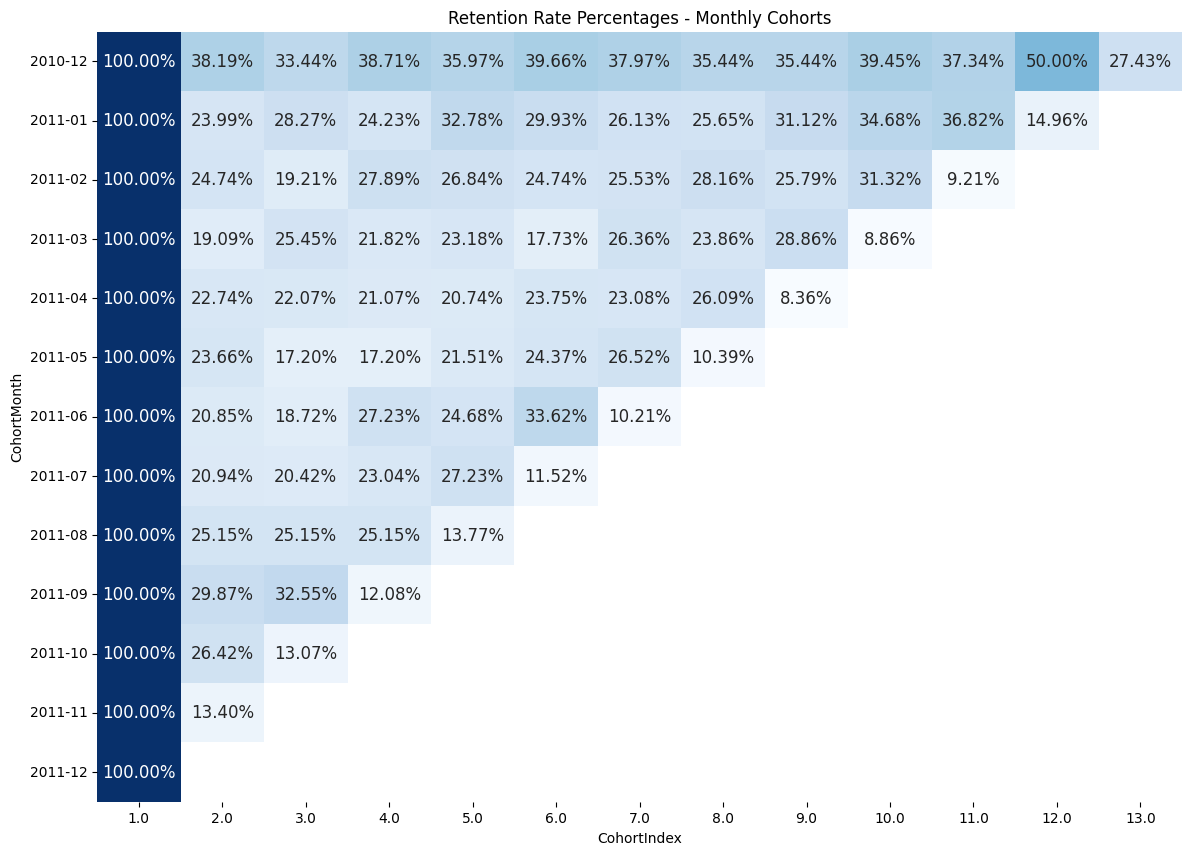

In [21]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df["InvoiceMonth"] = df["InvoiceDate"].apply(get_month)

df["CohortMonth"] = df.groupby("CustomerID")["InvoiceMonth"].transform("min")



invoice_year, invoice_month, invoice_day = get_dates(df, "InvoiceMonth")
cohort_year, cohort_month, cohort_day = get_dates(df, "CohortMonth")

year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

df["CohortIndex"] = 12 * year_diff + month_diff + 1





cohort_data = df.groupby(["CohortIndex", "CohortMonth"])["CustomerID"].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index = "CohortMonth", columns = "CohortIndex", values = "CustomerID")



cohort_sizes = cohort_pivot.iloc[:, 0]

retention = cohort_pivot.divide(cohort_sizes, axis = 0)
retention.index = retention.index.strftime("%Y-%m")



from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams["axes.facecolor"] = "white"
fig, ax = plt.subplots(figsize = (14, 10))

sns.heatmap(retention, cmap = "Blues", annot = True, fmt = ".2%", annot_kws = {"fontsize": 12}, cbar = False, ax = ax)

plt.title("Retention Rate Percentages - Monthly Cohorts")
plt.yticks(rotation = 0)
plt.show()